### ***Importing necessary libraries***



In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# Load the dataset
data = pd.read_excel('/content/iris (2)_new.xls')

### ***Understanding the dataset***

In [145]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [146]:
data.shape

(150, 5)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [148]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### ***checking for missing values***

In [149]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

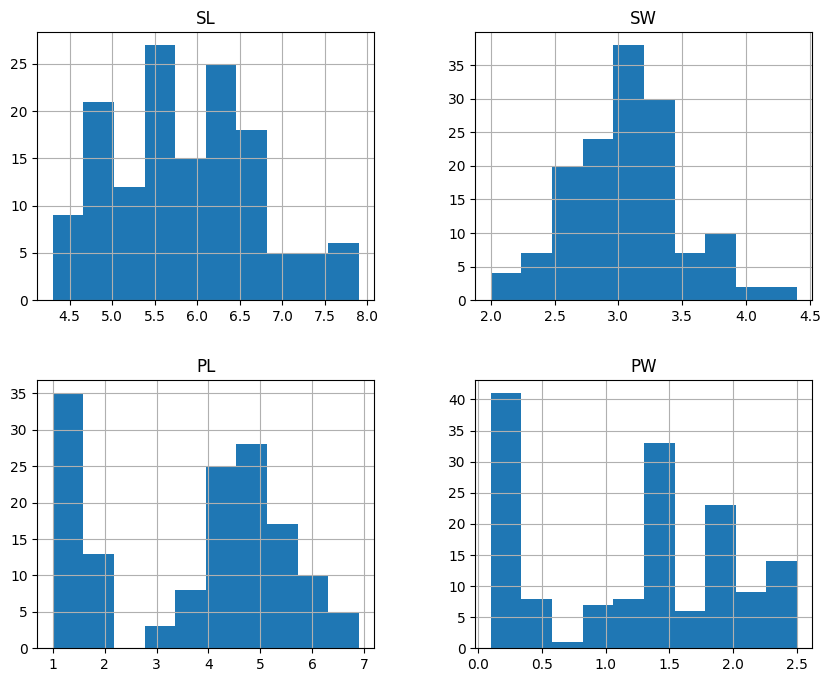

In [150]:
graph = data.select_dtypes(include=['float64'])
graph.hist(figsize=(10,8))
plt.show()

In [151]:
# filling missing values

data['SL'] = data['SL'].fillna(data['SL'].median())
data['SW'] = data['SW'].fillna(data['SW'].median())
data['PL'] = data['PL'].fillna(data['PL'].median())

In [152]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### ***Handling outliers***

In [153]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

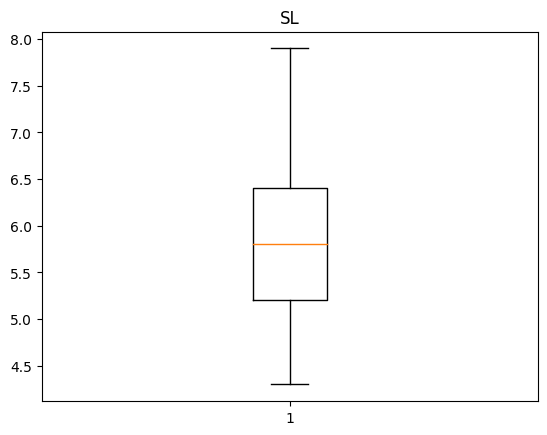

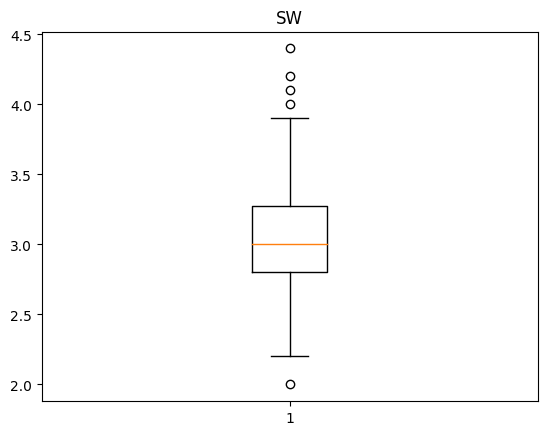

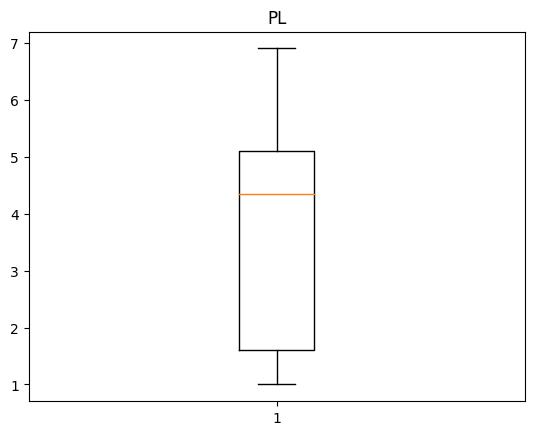

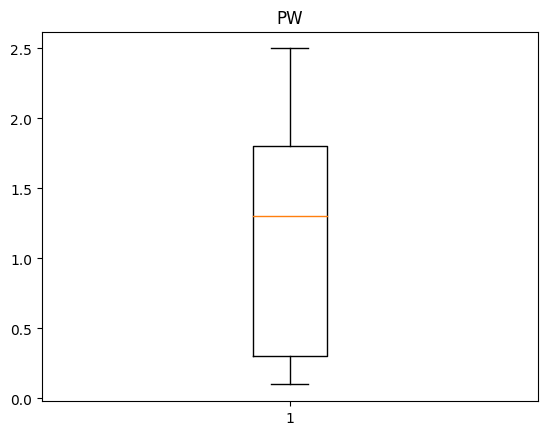

In [154]:
num_col = ['SL', 'SW', 'PL', 'PW']

for i in num_col:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

In [155]:
# Only SW contain outliers. As it has a skewed distribution, it can be filled using IQR method

Q1 = data['SW'].quantile(0.25)
Q3 = data['SW'].quantile(0.75)

IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

# clipping
data['SW'] = data['SW'].clip(lower=lower_lim, upper=upper_lim)
outliers = data[(data['SW'] < lower_lim) | (data['SW'] > upper_lim)]

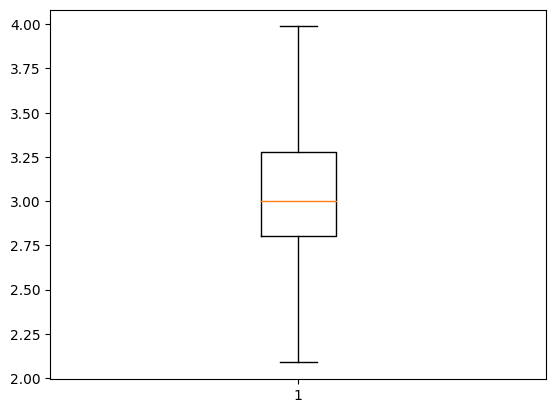

In [156]:
plt.boxplot(data['SW'])
plt.show()

### ***Encoding***

In [157]:
# Column classification conatin categorical variable, so it is encoded using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [158]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### ***Correlation***

<Axes: >

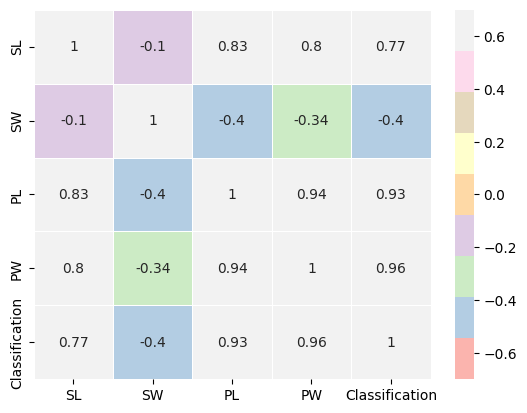

In [159]:
sns.heatmap(data.corr(), vmin = -0.7, vmax = 0.7, cmap = 'Pastel1', linewidths = 0.5, annot=True)

In [160]:
# we can see that there is a strong correlation between PL-PW
# Therefore  one can be dropped

data.drop(['PL'],axis = 1, inplace = True)

<Axes: >

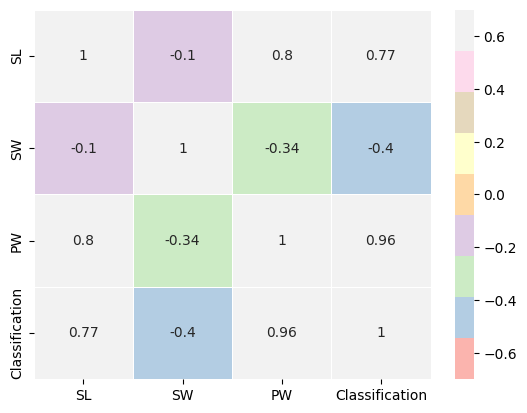

In [161]:
sns.heatmap(data.corr(), vmin = -0.7, vmax = 0.7, cmap = 'Pastel1', linewidths = 0.5, annot=True)

In [162]:
# Separate features and target variable

X = data.drop(['Classification'], axis=1)
y = data['Classification']

In [163]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

### ***Decision Tree***

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Fine-tune Decision Tree
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

# Print best parameters for Decision Tree and Random Forest
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}


In [165]:
dt_classifier = DecisionTreeClassifier(random_state = 42, criterion='gini', max_depth= 20, min_samples_leaf= 4, min_samples_split= 5, splitter= 'random')

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                       random_state=42, splitter='random')

In [166]:
# Make prediction
y_pred_dt = dt_classifier.predict(X_test)

In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test,y_pred_dt))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [168]:
print('Accuracy :',accuracy_score(y_test,y_pred_dt))
print('Precision :',precision_score(y_test,y_pred_dt, average = 'weighted'))
print('recall :',recall_score(y_test,y_pred_dt, average = 'weighted'))
print('F1 :',f1_score(y_test,y_pred_dt, average = 'weighted'))

Accuracy : 1.0
Precision : 1.0
recall : 1.0
F1 : 1.0


### ***Random Forest***

In [170]:
from sklearn.ensemble import RandomForestClassifier
# Create random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=None, criterion='entropy', min_samples_split=2)

# Train the model
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [171]:
# Make prediction
y_pred_rf = rf_classifier.predict(X_test)

In [172]:
print(confusion_matrix(y_test,y_pred_rf))

[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


In [173]:
print('Accuracy :',accuracy_score(y_test,y_pred_rf))
print('Precision :',precision_score(y_test,y_pred_rf, average = 'weighted'))
print('recall :',recall_score(y_test,y_pred_rf, average = 'weighted'))
print('F1 :',f1_score(y_test,y_pred_rf, average = 'weighted'))

Accuracy : 0.9333333333333333
Precision : 0.9435897435897436
recall : 0.9333333333333333
F1 : 0.9319444444444444


### ***Logistic Regression***

In [174]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [175]:
# Train the model

logistic_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [176]:
y_logistic_pred = logistic_reg.predict(X_test)
y_logistic_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [177]:
confusion_matrix(y_test,y_logistic_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [178]:
print('Accuracy :',accuracy_score(y_test,y_logistic_pred))
print('Precision :',precision_score(y_test,y_logistic_pred, average = 'weighted'))
print('recall :',recall_score(y_test,y_logistic_pred, average = 'weighted'))
print('F1 :',f1_score(y_test,y_logistic_pred, average = 'weighted'))

Accuracy : 1.0
Precision : 1.0
recall : 1.0
F1 : 1.0


### ***K-Nearest Neighbors (KNN)***

In [179]:
# hyperparameter tuning

from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p=2)
  classifier.fit(X_train, y_train)
  y_pred_knn = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_knn)
  metric_k.append(accuracy)


Text(0, 0.5, 'Accuracy')

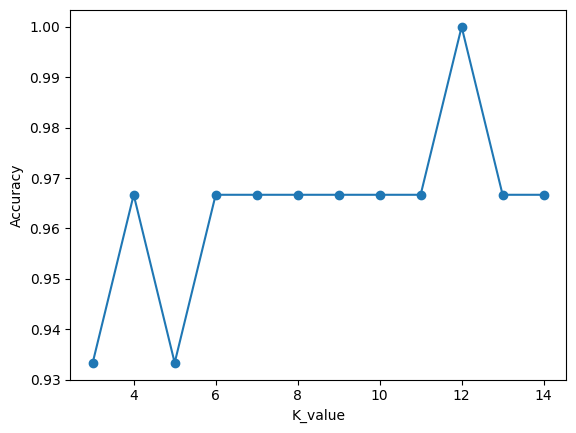

In [180]:
# plotting a line graph showing the relationship between the number of neighbors (k) and the corresponding accuracy

plt.plot(neighbors, metric_k, 'o-' )
plt.xlabel('K_value')
plt.ylabel('Accuracy')

In [184]:
# Create KNN classifier object
classifier = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p=2)

# Train the KNN classifier on the training data.
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [185]:
# Make prediction
y_pred_knn = classifier.predict(X_test)

In [186]:
print('Accuracy :',accuracy_score(y_test,y_pred_knn))
print('Precision :',precision_score(y_test,y_pred_knn, average = 'weighted'))
print('recall :',recall_score(y_test,y_pred_knn, average = 'weighted'))
print('F1 :',f1_score(y_test,y_pred_knn, average = 'weighted'))

Accuracy : 1.0
Precision : 1.0
recall : 1.0
F1 : 1.0


### ***Support Vector Machine (SVM)***

In [187]:
from sklearn.svm import SVC

# Create SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [188]:
# Make prediction
y_pred_svm = svm_classifier.predict(X_test)

In [189]:
print(confusion_matrix(y_test,y_pred_svm))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [190]:
print('Accuracy :',accuracy_score(y_test,y_pred_svm))
print('Precision :',precision_score(y_test,y_pred_svm, average = 'weighted'))
print('recall :',recall_score(y_test,y_pred_svm, average = 'weighted'))
print('F1 :',f1_score(y_test,y_pred_svm, average = 'weighted'))

Accuracy : 0.9666666666666667
Precision : 0.9694444444444444
recall : 0.9666666666666667
F1 : 0.9664109121909632


In [191]:
from sklearn.model_selection import cross_val_score

# Define a list of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results[name] = scores.mean(), scores.std()

# Print average performance of each model
for name, (mean_score, std_score) in results.items():
    print(f'{name}: Mean Accuracy = {mean_score}, Std Accuracy = {std_score}')

Logistic Regression: Mean Accuracy = 0.9499999999999998, Std Accuracy = 0.10000000000000002
Decision Tree: Mean Accuracy = 0.9, Std Accuracy = 0.11055415967851333
Random Forest: Mean Accuracy = 0.9249999999999998, Std Accuracy = 0.09464847243000457
SVM: Mean Accuracy = 0.9333333333333333, Std Accuracy = 0.0816496580927726
KNN: Mean Accuracy = 0.9499999999999998, Std Accuracy = 0.055277079839256664


In [193]:
mean_accuracy_scores = {
    'Logistic Regression':  0.9499999999999998,
    'Decision Tree': 0.9,
    'Random Forest': 0.9249999999999998,
    'SVM': 0.9333333333333333,
    'KNN':0.9499999999999998
}

# Find the model with the highest mean accuracy score
best_model = max(mean_accuracy_scores, key=mean_accuracy_scores.get)
best_accuracy = mean_accuracy_scores[best_model]

print("Best Model:", best_model)
print("Mean Accuracy:", best_accuracy)

Best Model: Logistic Regression
Mean Accuracy: 0.9499999999999998


### ***THE BEST MODEL IS LOGISTIC REGRESSION***

**The Logistic Regression model achieved the highest mean accuracy score of 94.99%. It's a commonly used linear classification algorithm for binary tasks. It models probabilities and works well when data relationships are linear or well-separated. This makes it a suitable choice for accurate predictions on the Iris dataset.**